# Part I - Ford GoBike System Data Exploration
## by Abdus-Salaam AbdulHafiz

## Introduction
> This notebook examines a dataset that details individual rides taken in the greater San Francisco Bay area's bike-sharing system in February 2019.

>Like other bike share programs, Ford GoBike uses a fleet of sturdy, durable bikes that are locked into a system of docking stations spread out over the city( San Francisco Bay area). The bikes are perfect for one-way travels because they may be unlocked from one station and returned to any other station in the network. The bike share program is used by people for a variety of purposes, including getting to and from work, school, and doing errands. It's an enjoyable, practical, and inexpensive mode of transportation.


## Preliminary Wrangling


In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


sb.set_style('darkgrid')

In [2]:
#loading the dataset into dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape,"\n")
print(df.dtypes,"\n")
display(df.sample(5))

(183412, 16) 

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object 



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
52839,257,2019-02-21 16:51:26.2770,2019-02-21 16:55:43.6770,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,89.0,Division St at Potrero Ave,37.769218,-122.407646,4372,Subscriber,1991.0,Male,No
100661,434,2019-02-14 18:10:55.9060,2019-02-14 18:18:10.1120,386.0,24th St at Bartlett St,37.752105,-122.419724,145.0,29th St at Church St,37.743684,-122.426806,5262,Subscriber,1982.0,Male,No
8946,2442,2019-02-28 07:21:39.4970,2019-02-28 08:02:22.3550,211.0,Broadway at 40th St,37.827757,-122.256716,218.0,DeFremery Park,37.812331,-122.285171,6068,Subscriber,1992.0,Female,No
161028,505,2019-02-05 16:08:41.5700,2019-02-05 16:17:06.7250,16.0,Steuart St at Market St,37.794130,-122.394430,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4737,Subscriber,1981.0,Male,No
170511,184,2019-02-04 08:13:40.1770,2019-02-04 08:16:45.0330,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,4347,Subscriber,1989.0,Male,No


In [4]:
# descriptive statistics for numeric variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [5]:
#checking for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

0

### What is the structure of your dataset?

> There are 183,412 rides made in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip').

>Most variables are numeric, some variables like the start_time and end_time have the wrong data type(object) instead of  datetime datatype.

> Also, some feautures contain missing missing values. The feautures are start_station_id (197), start_station_name(197), end_station_id(197), end_station_name(197), member_birth_year(8265) and member_gender(8265) contained missing values with the following percentages:

### What is/are the main feature(s) of interest in your dataset?

> 1. The time of day, day of the week that most trips are taken
2. The duration of the ride
3. The user type taking the rides if a user is a subscriber or a customer?
4. The days of the week with rides
5. The names of the start and stop stations
6. Ages and genders of members


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. duration_sec, start time,end_time
2. start_station_name , end_station_name
3. user_type , member_birth_year,member_gender

In [7]:
# make a copy of the original dataset to clean and extract some other feautures
df_copy = df.copy()

In [8]:
# extract day of the week(Mon-Sun)
df_copy['day_of_week'] = pd.to_datetime(df_copy['start_time']).dt.day_name()
#Extract day
df_copy['day'] = pd.to_datetime(df_copy['start_time']).dt.day
# extract hour
df_copy['start_hour'] = pd.to_datetime(df['start_time']).dt.hour
#Extract time period into morning, afternoon or night
df_copy['time_of_day'] = 'Morning'
df_copy['time_of_day'][(df_copy['start_hour'] >= 12) & (df_copy['start_hour'] <= 19)] = 'Afternoon'
df_copy['time_of_day'][(df_copy['start_hour'] >19) & (df_copy['start_hour'] <= 23)] = 'Night'

# print the added columns
print(df_copy[['day_of_week','start_hour','time_of_day']].sample(3))

       day_of_week  start_hour time_of_day
27224       Monday          10     Morning
176683    Saturday          10     Morning
168512      Monday          14   Afternoon


C:\Users\USER\AppData\Local\Temp\ipykernel_22768\1220860319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['time_of_day'][(df_copy['start_hour'] >= 12) & (df_copy['start_hour'] <= 19)] = 'Afternoon'
C:\Users\USER\AppData\Local\Temp\ipykernel_22768\1220860319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['time_of_day'][(df_copy['start_hour'] >19) & (df_copy['start_hour'] <= 23)] = 'Night'


## Univariate Exploration



<Figure size 864x432 with 0 Axes>

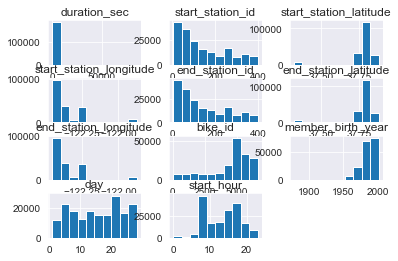

In [9]:
plt.figure(figsize=[12, 6])
# a brief and quick look into our dataset
df_copy.hist();

### Function  for Plot counts

In [10]:
##Function for plotting
def countPlot(df,xVar,hue=None,order=None,annot=True,hue_order=None):
    
    # set plot dimension
    plt.figure(figsize=[14, 5])
            
    #choose base color
    base_color = sb.color_palette()[0]
    #plot
    sb.countplot(data = df, x = xVar,hue=hue, color = base_color,order=order,edgecolor='black',linewidth=2,hue_order=hue_order)
    if annot:
            var_counts = df[xVar].value_counts() 
            total_rides = var_counts.sum()
            # print frequency on the bar chart
            locs, labels = plt.xticks(size=14)
            for loc, label in zip(locs, labels):                
                count = var_counts[label.get_text()]
                pct_string = '{:0.1f}%'.format(100*count/total_rides)
                plt.text(loc, count-15000, pct_string, ha='center',color='white',fontsize=12)
               
    #after plotting,clean up varialble names
    xVar = xVar.replace('_',' ')#replace with a space
    if hue:
              hue = hue.replace('_',' ') 
            
    
    #Add title and format it 
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(),fontsize=14,weight='bold')
    #xlabel and formatting
    plt.xlabel(xVar.title(),fontsize=10,weight='bold')
    #xlabel and formatting
    plt.ylabel('Rides'.title(),fontsize=10,weight='bold')
    
plt.show()

### Q: What's the distribution of number of rides taken on different days of the week

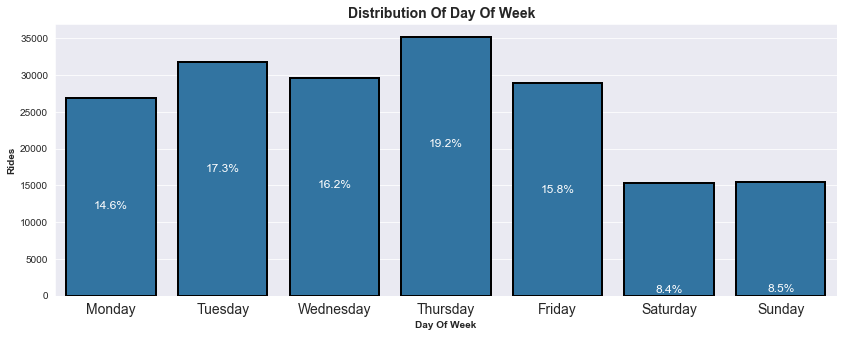

In [11]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#calling function to plot graph
countPlot(df_copy,'day_of_week',order=day_order)

### > Observation:
    Most rides in February 2019 were taken on Mondays with 19.2% and the least rides were generally on weekends(might indicate the rides majorly for coperate purposes)

### Q: What's the period of the day with most rides

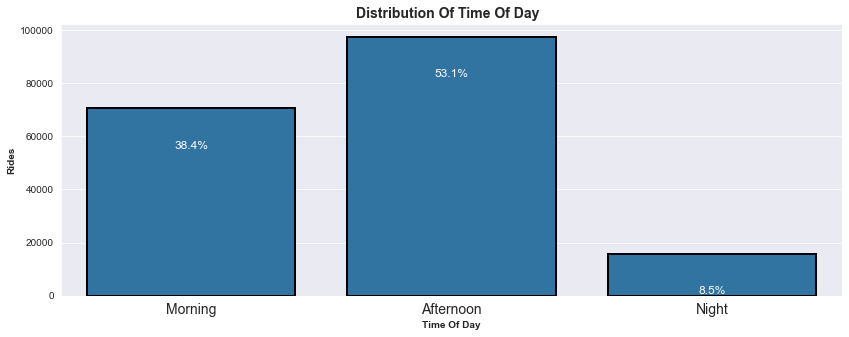

In [12]:
#order
period_order=['Morning','Afternoon','Night']
#calling function to plot graph
countPlot(df_copy,'time_of_day',order=period_order)

### > Observation:
    Most rides were in the afternoon(12pm-7pm) and and the least rides were at night(7pm to 12am)

### Q: Whats the distribution of Rides in specific hours

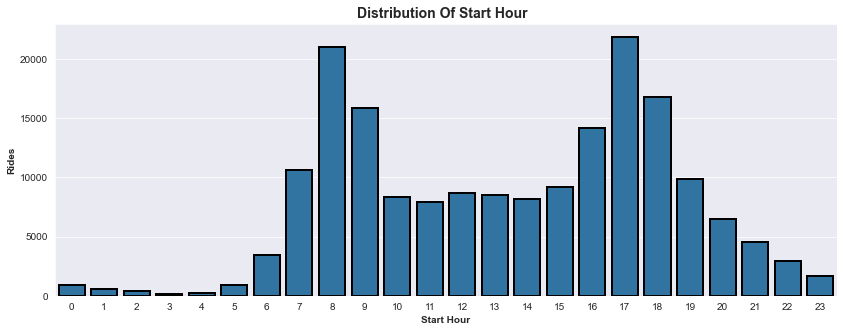

In [13]:
#calling function to plot graph
countPlot(df_copy,'start_hour',annot=False)

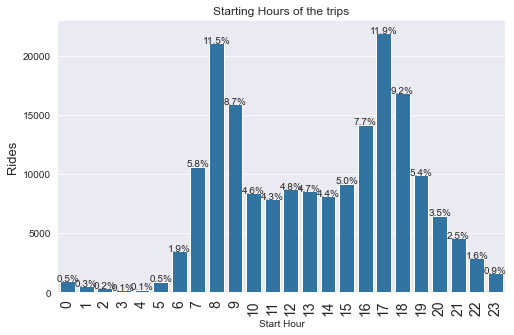

In [49]:
# plot distribution based on hour
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_copy, x = 'start_hour', color = base_color)
plt.title('Starting Hours of the trips')
plt.xticks(rotation= 90)
plt.xlabel('Start Hour')
plt.ylabel('Rides',fontsize=13)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

user_counts = df_copy['start_hour'].value_counts()
total_rides = user_counts.sum()
locs, labels = plt.xticks(size=14)

# print frequency on the bar chart
total = len(df_copy)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')


plt.show()

###  Observation :
    Even though most rides were noticed to be carried out in the afternoon period, from the above graph it can be seen that the rides rises and  paeak around 8am and 5pm most rides for the hours indivilly was around 8am and 9

#### Q: What's the distribution of the types of Members we have

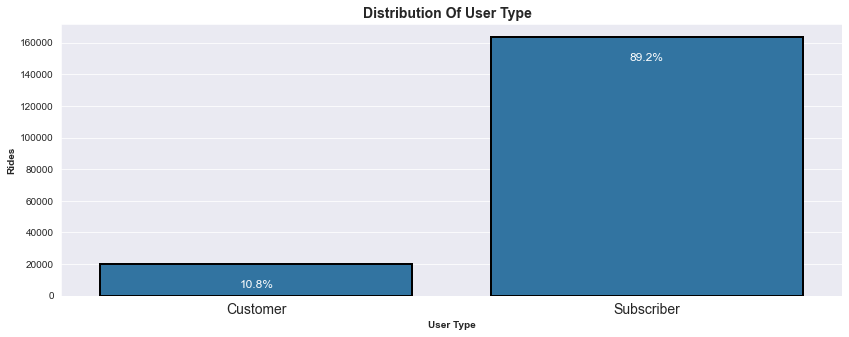

In [15]:
#calling function to plot graph
countPlot(df_copy,'user_type')

### > Observation:
    Most of our users are subscribers(89.2%)

### Q: Whats the gender distribution among our members

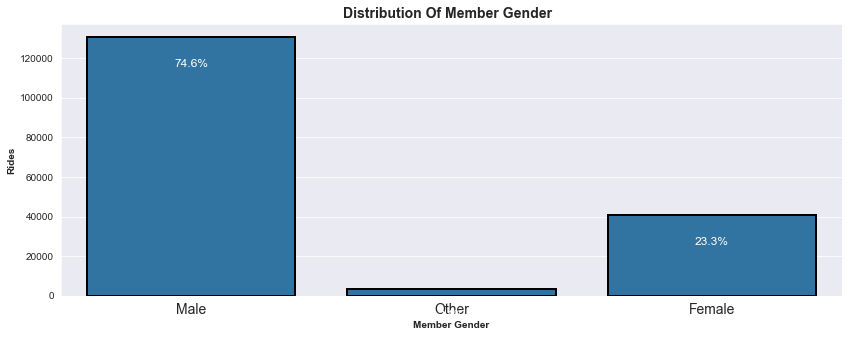

In [16]:
#calling function to plot graph
countPlot(df_copy,'member_gender')

### > Observation:
    Most of our customers are Males were more(74.6%)

### Exploring the duration spent on journeys

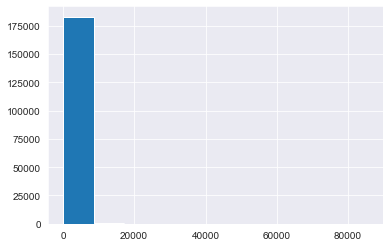

In [17]:
df_copy.duration_sec.hist();

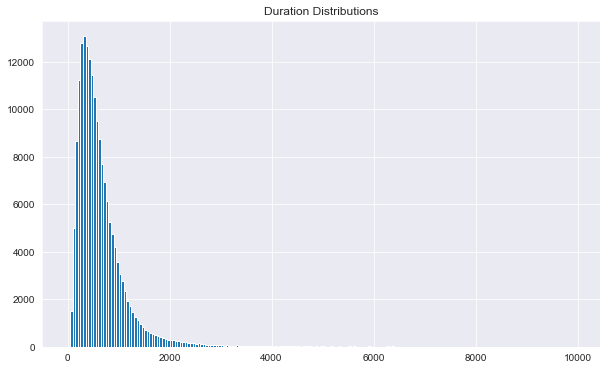

In [18]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(df_copy.duration_sec, bins=bins)
plt.title('Duration Distributions');

###  
> No much information here, lets check it per minutes

### Q: Whats the relationship betweeen rides and the number of minutes used

In [19]:
# Converting the seconds into minutes for better understanding of the graph and storing it in a new column.
df_copy['duration_min'] = df_copy['duration_sec'] / 60

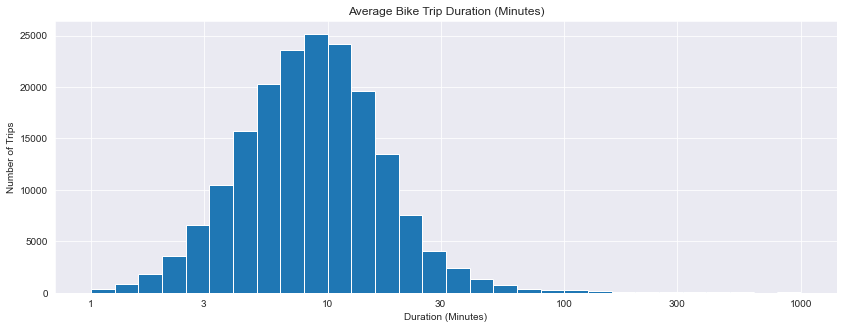

In [51]:
plt.figure(figsize = [14, 5])  

#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

### 
> Most Rides were short rides as it can be seen from the chart. Most of the rides were around 3-10 mins 

### Q : What is the age distribution of the  members

In [21]:
# create the age column taking the year 2019 as the current year
df_copy['member_age'] = df_copy['member_birth_year'].apply(lambda x: 2019 - x)
# drop the 'member_birth_year" column
df_copy.drop('member_birth_year' , axis = 1 , inplace = True)
# test
df_copy[['member_age']].sample(2)

,member_age
144472,30.0
104058,32.0


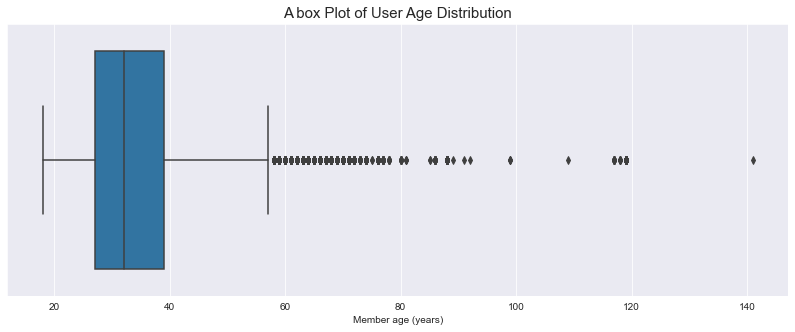

In [50]:
# A Box PLOT for members' age
plt.figure(figsize = [14, 5])  
sb.boxplot(data=df_copy, x='member_age', color = base_color);      
plt.xlabel('Member age (years)');

plt.title('A box Plot of User Age Distribution',fontsize=15);

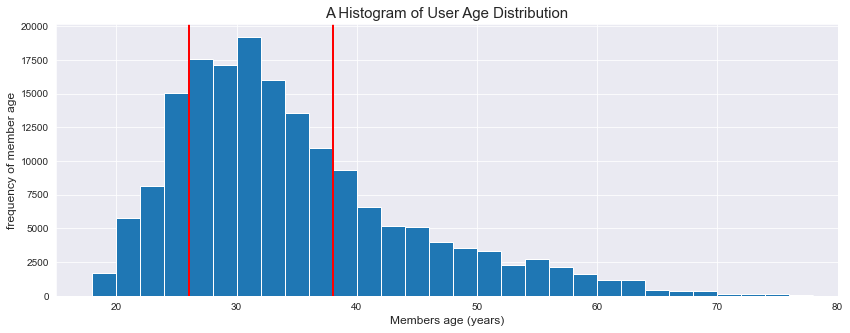

In [52]:
# PLOT the histogram for member age
plt.figure(figsize = [14, 5])           
 # Get the bins between [0-max age], at an interval of Two year.
bins_age = np.arange(0, df_copy['member_age'].max()+2, 2)                 
plt.hist(data=df_copy, x='member_age', bins=bins_age, color=base_color)  
plt.xlim([15,80])
# Draw a red line for a selected ranges.
plt.axvline(x=26, color='r',linewidth=2)                            
plt.axvline(x=38, color='r',linewidth=2)                          
plt.title('A Histogram of User Age Distribution',fontsize=15)
plt.xlabel('Members age (years)',fontsize=12)
plt.ylabel('frequency of member age',fontsize=12);

###### Observation:
    The age of members ranges from 20 to 140, with most the ages between 20and 60

In [24]:
# create a new column member_age_bin to group the members ages
max_age = str(int(df_copy.member_age.max()))
df_copy['member_age_bin'] = df_copy['member_age'].apply(lambda x: '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)

# test
df_copy[['member_age_bin']].sample(3)

,member_age_bin
114391,31 - 40
62156,31 - 40
60005,21 - 30


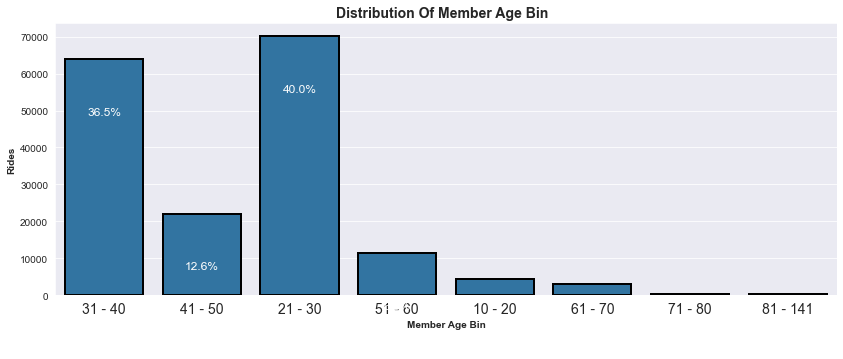

In [25]:
#calling function to plot graph
countPlot(df_copy,'member_age_bin')

### 
'Most riders are youths(21-30yrs,31-40yrs) having 70% of the rides,and teens(10-20) taking more rides than the elderly(61-70)

## Q: What are the most used stations for start and stop

In [26]:
def create_barh_plot(df, y_col, title, x_label, y_label, text_size, common=True):
    plt.figure(figsize=[8, 5])
    plt.title(title, fontsize=15)
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    #df[y_col].value_counts(ascending=True).tail(10).plot.barh()

    # Display the count value on each bar
    if common==True:
        for i, v in enumerate(df[y_col].value_counts(ascending=True).tail(10)):
            df[y_col].value_counts(ascending=True).tail(10).plot.barh()
            plt.text(v + 0.2, i - 0.1, str(v), color='blue', size=text_size)
    elif common == False:
        
        for i, v in enumerate(df[y_col].value_counts(ascending=True).head(10)):
            df[y_col].value_counts(ascending=True).head(10).plot.barh()
            plt.text(v + 0.2, i - 0.1, str(v), color='blue', size=text_size)
            
    plt.show()


## Start station

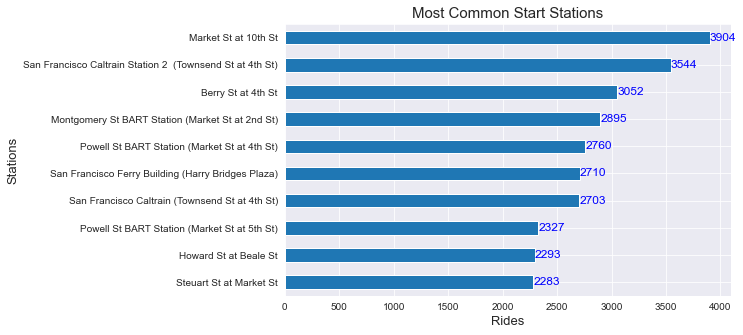

In [27]:
create_barh_plot(df_copy, 'start_station_name', 'Most Common Start Stations', 'Rides', 'Stations', 12)

### Stop Station

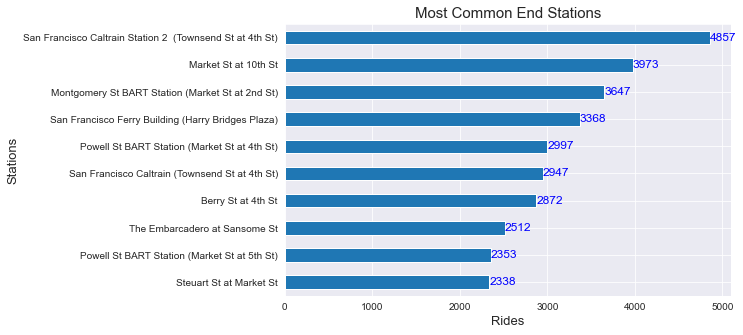

In [28]:
create_barh_plot(df_copy, 'end_station_name', 'Most Common End Stations', 'Rides', 'Stations', 12)

## Q: Which Stations are rarely used?.

### Start station

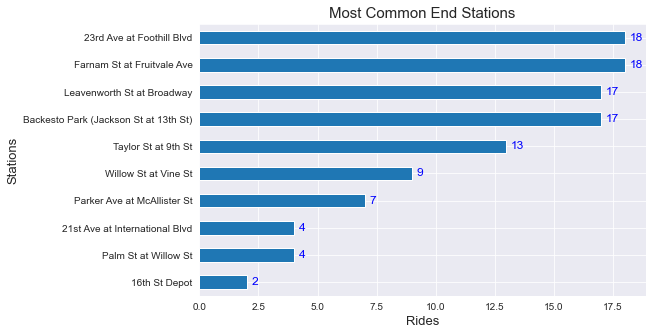

In [29]:
create_barh_plot(df_copy, 'start_station_name', 'Most Common End Stations', 'Rides', 'Stations', 12,common=False)

#### End Station 

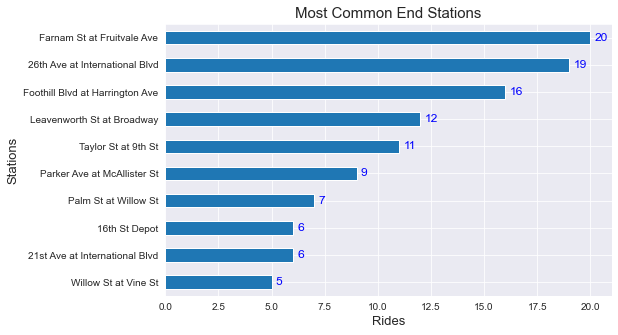

In [30]:
create_barh_plot(df_copy, 'end_station_name', 'Most Common End Stations', 'Rides', 'Stations', 12,common=False)

### 
Observation:

    > Most common start and stop stations stations for the rides are Market St at 10th St and                                         3973
      San Francisco Caltrain Station 2  (Townsend St at 4th St) 
    > Least common Start and stop Stations are 16th St Depot and Palm St at Willow St

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I had to extract the essential data from the start time column in order to examine the hour of the day, period of the day (morning or afternoon), and day of the week of which the majority of rides were taken. Also, I deduced the members' ages from their dates of birth and then organized them into bins and groups.

> Did log transformation on duration(mins) 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Ages of 60-180  appared to be outliers

## Bivariate Exploration


#### I want to start by examining the pairwise correlations between the features in the data.

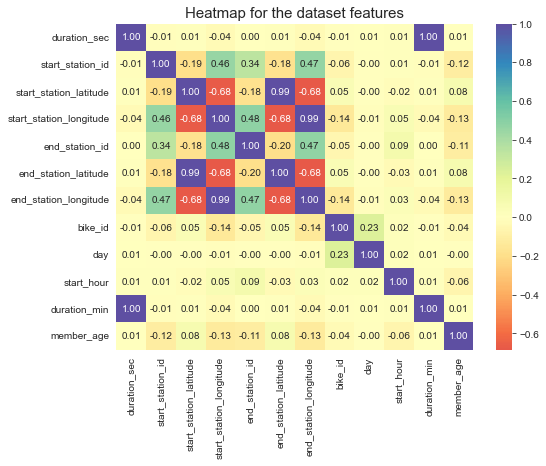

In [31]:
plt.figure(figsize=[8, 6])
sb.heatmap(df_copy.corr(), annot = True, fmt = '.2f', cmap = 'Spectral', center = 0)
plt.title('Heatmap for the dataset features', fontsize=15);

#### Observation:

    It can be evidenced from the heatmap that there's little or no correlation between the feautures in the data

## Q: Whats the distribution of how type of members in respect to gender?

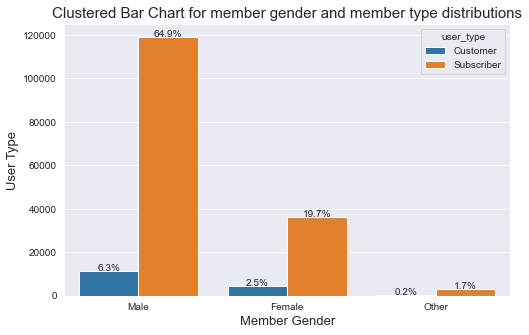

In [32]:
# Resize figure to accommodate Three plots
plt.figure(figsize = [8, 5])
ax= sb.countplot(data = df_copy, x = 'member_gender', hue = 'user_type', order=['Male','Female','Other'])
plt.title('Clustered Bar Chart for member gender and member type distributions', fontsize=15)

plt.xlabel('Member Gender',fontsize=13)
plt.ylabel('User Type',fontsize=13)

# print frequency percentage on the bar chart
total = len(df_copy)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### 
Observation:

    Most of the members are subscribers of which most are also males

## Q: Whats the distribution of how type of members in respect to Age?

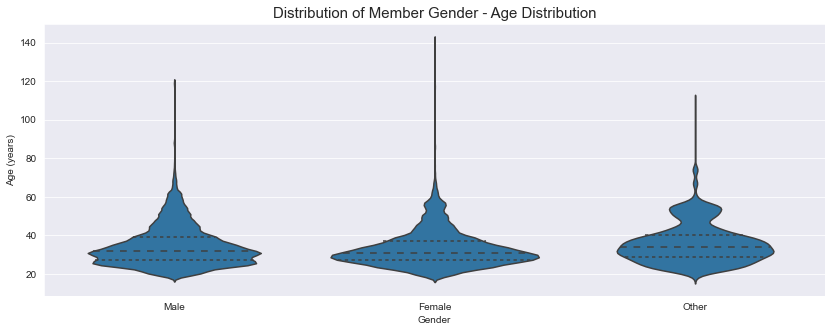

In [33]:
plt.figure(figsize = [14, 5])
 # Violin Plot for the member age & gender
sb.violinplot(data=df_copy, x='member_gender', y='member_age', color = base_color, inner = 'quartile', order=['Male','Female','Other'])
plt.title('Distribution of Member Gender - Age Distribution', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Age (years)');

###
> Males using the Ride service have the 3rd quartile are 40yrs and have riders above than females and less below 40yrs than females 

>Females using the Ride service are more within the 20-30yrs less in the 40-60 age bracket than the males. 

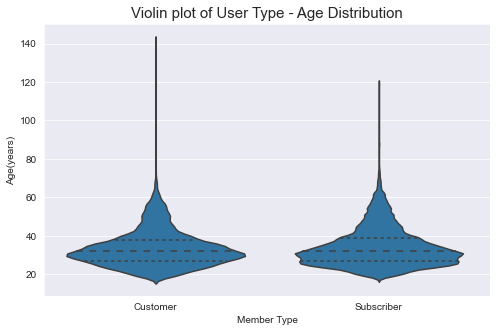

In [34]:
plt.figure(figsize = [8, 5])
# Violin Plot for the member age & gender
sb.violinplot(data=df_copy, x='user_type', y='member_age', color = base_color, inner = 'quartile') 
plt.title('Violin plot of User Type - Age Distribution', fontsize=15)
plt.xlabel('Member Type')
plt.ylabel('Age(years)');

##### > Customers can be seen to have similar age distribution with Subsrcibers

## Q: Whats the distribution of Days of the month and user type

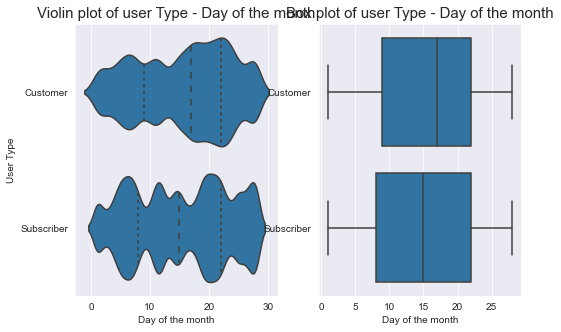

In [35]:

# Resize figure to accommodate Two plots
plt.figure(figsize = [8, 5])


plt.subplot(1, 2, 1)
# Violin plot for the user type & day of the month
plt.title('Violin plot of user Type - Day of the month', fontsize=15)
sb.violinplot(data=df_copy, y='user_type', x='day', color = base_color, inner = 'quartile') 
plt.ylabel('User Type')
plt.xlabel('Day of the month')

plt.subplot(1, 2, 2)
  # Box Plot for the user type & day of the month
sb.boxplot(data=df_copy, y='user_type', x='day', color = base_color)                      
plt.title('Box plot of user Type - Day of the month', fontsize=15)
plt.ylabel('')
plt.xlabel('Day of the month');

#### 
>It can be seen that Rides reduced in the mid of the month and increased towards the end of the month for both customers and subscribers.
>it reduces though from the 25th to the end of the month

## Q: What period of the days do we have members rides most distributed

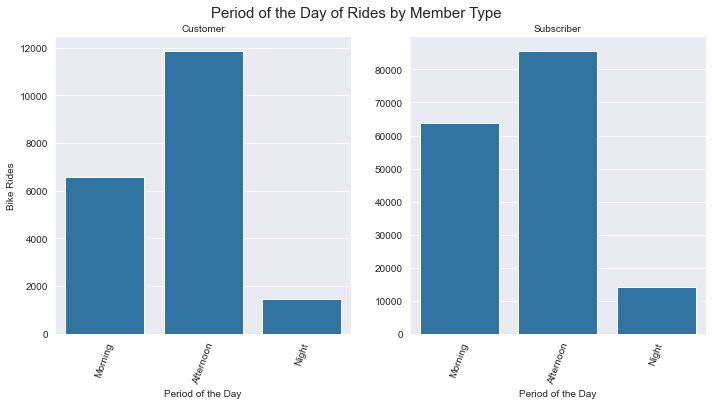

In [36]:
base_color = sb.color_palette()[0]

day_period = ['Morning', 'Afternoon', 'Night']
ax = sb.catplot(data=df_copy, x='time_of_day', col="user_type", kind='count', sharey = False,color = base_color, order = day_period)
ax.set_axis_labels("Period of the Day", "Bike Rides")
ax.set_titles("{col_name}")
ax.fig.suptitle('Period of the Day of Rides by Member Type', y=1.02, fontsize=15)
ax.set_xticklabels(rotation = 70);

### 

Observation:

    More rides took place in the Afternoon for subscribers compared to the ones for Customers

### Q: What is the daily distribution of daily bike usage per type of member

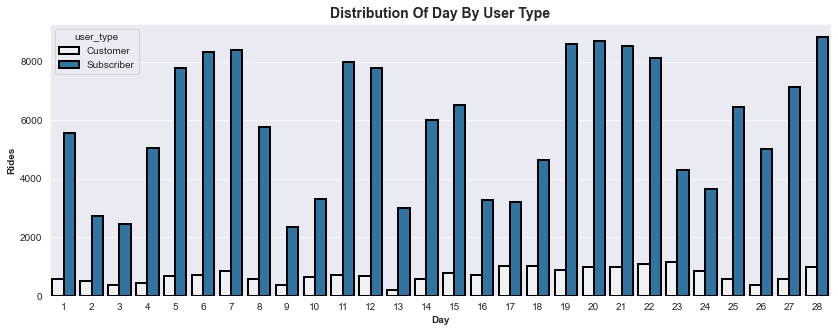

In [37]:
countPlot(df_copy,'day',hue = 'user_type',annot=False)

#### Observation:
>Subscribers generally use the entire service more than customers and this is reflected right here in the day to day use.

>The 9th day has the lowest numbe rof rides taken from customers, but unsurprisingly, not the lowest for customers as that is day 13, with day 13 having more subscribers than day 9

>Riders generally took more ride in the last day of the month

### Q: What is the distribution of hourly bike usage per type of member

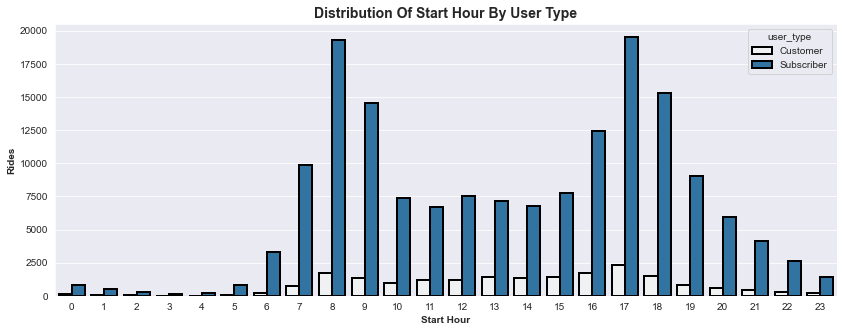

In [38]:
countPlot(df_copy,'start_hour',hue = 'user_type',annot=False)

#### Observation:
> More subscribers still take the rides from hour to hour as seen with the common hours been 8am and 5pm.
>Most RIdes start around  in the morning, peaks 8, reduces miday, peaks 5 and reduces for the rest of the day

## Q: What is the distribution of daily bike usage per type of member

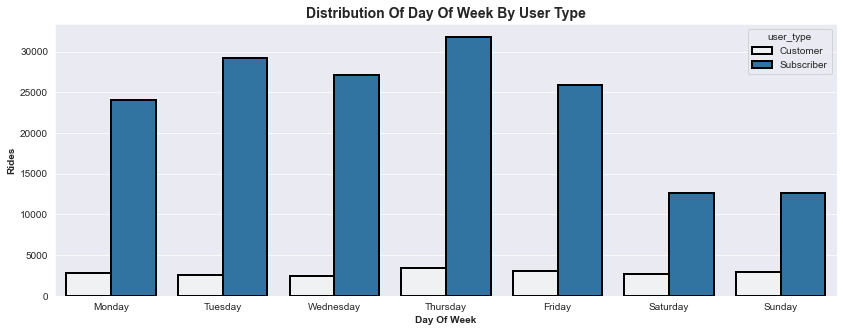

In [39]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plot
countPlot(df_copy,'day_of_week',hue = 'user_type',annot=False,order=day_order)

### Observation:
>Thursdays generally have the highest number of rides for both subscribers and customers.

> Weekends have low number of rides for subscribers, both pretty same numbe rof rides for cusomers
  higlighting the fact that the customers rather take rides as a leisure act everyday but the subscribers take it
  the rides more dut=ring weekdays and little on weekends

## Q: What is the Average Duration of Ride(secs) in the month taken by different types of members 

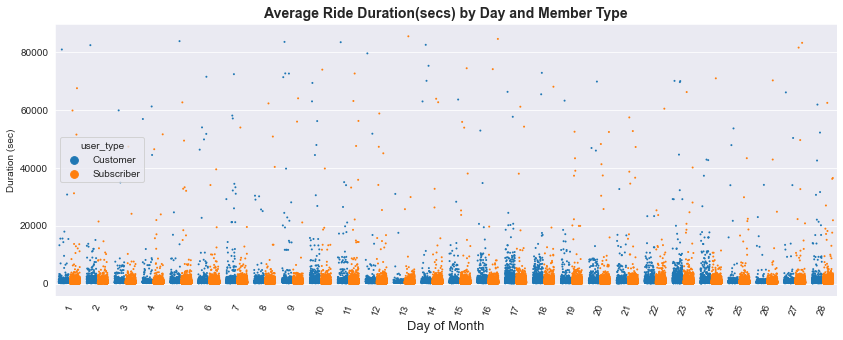

In [40]:
plt.figure(figsize=[14,5])

sb.stripplot(data=df_copy, x='day', y='duration_sec', hue='user_type',size=2, jitter=0.35, dodge=True)
plt.xticks(rotation= 70);
plt.xlabel('Day of Month',fontsize=13);
plt.ylabel('Duration (sec)');
plt.title('Average Ride Duration(secs) by Day and Member Type', fontweight='bold', fontsize=14);

### Observation:
>Over the course of the days of the month, its the customers that take far more travel duration than subscribers. This  might indicate that the subscribers use it more for short rides 

## Q: What is the Average Duration of Ride per day taken by different types of members

In [41]:
df_copy.groupby(['user_type','day_of_week']).mean()['duration_sec'].to_frame()

duration_sec
user_type  day_of_week              
Customer   Friday        1199.634323
           Monday        1440.821598
           Saturday      1811.849580
           Sunday        1858.298343
           Thursday      1334.841003
           Tuesday       1129.448196
           Wednesday     1242.210057
Subscriber Friday         636.967554
           Monday         630.437145
           Saturday       706.051792
           Sunday         704.489269
           Thursday       631.277235
           Tuesday        621.713904
           Wednesday      622.079006

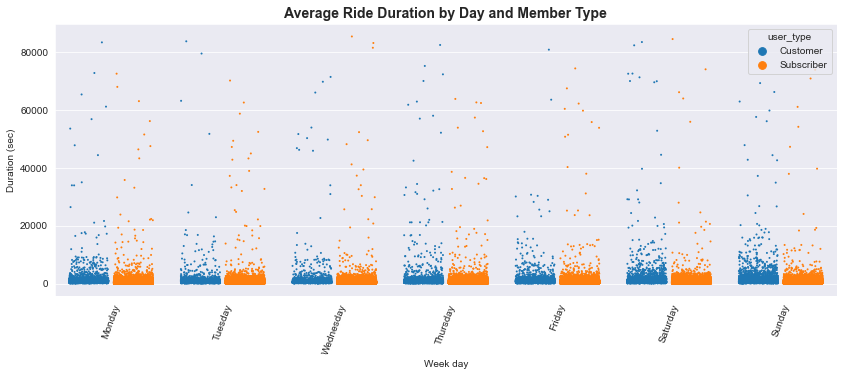

In [42]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plot
plt.figure(figsize=[14, 5])
sb.stripplot(data=df_copy, x='day_of_week', y='duration_sec', hue='user_type',size=2, jitter=0.35, dodge=True,order=day_order);
plt.xticks(rotation= 70);
plt.xlabel('Week day');
plt.ylabel('Duration (sec)');
plt.title('Average Ride Duration by Day and Member Type', fontweight='bold', fontsize=14);

### Observation
>The same fact manifests here also where customers travel farther distances then subscribers

## Q: Distribution of Rides on different days of the week and and accross different periods of the day

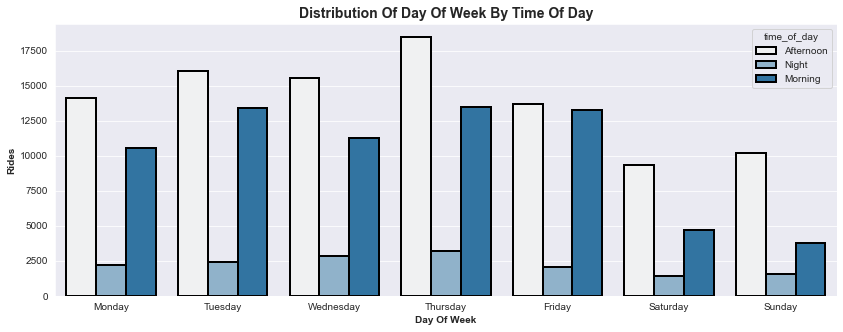

In [43]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plot
countPlot(df_copy,'day_of_week',hue = 'time_of_day',annot=False,order=day_order)

### Observation:
> Afternoons(12pm-7pm) still always has the highest number of rides across different days of the week folowed by in the morning then night.

> Fridays are a bit different as they almost have the same number of rides take both in the morning and afternoon

### Q: What is the Trip duration and Age distribution of the per duration of rides in minutes

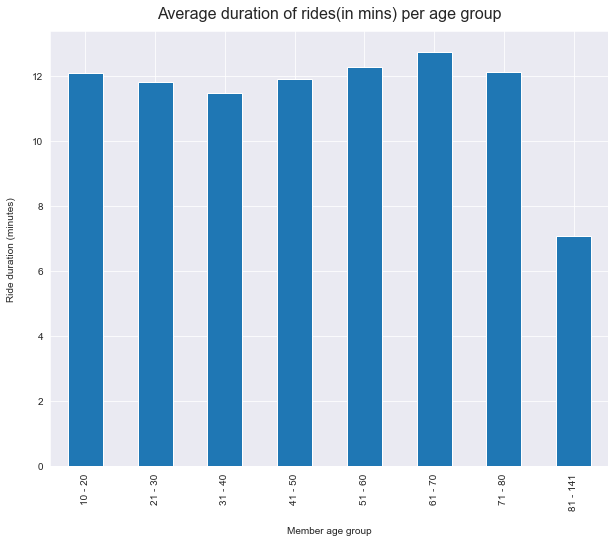

In [44]:

df_copy.groupby('member_age_bin')['duration_min'].mean().plot(kind='bar', color=base_color, figsize=(10,8))
plt.title('Average duration of rides(in mins) per age group', fontsize=16, y=1.015)
plt.xlabel('Member age group', labelpad=16)
plt.ylabel('Ride duration (minutes)', labelpad=16);

#### Customers above 41yrs of age increasingly take longer rides as compared with the rest

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> daily number of bike rides peaked at 8am and 5pm!
>The number of daily journeys for subscribers is relatively high throughout the week and very low on the weekends. Customers' daily bike trips, however, did not differ considerably from one another.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most Subscribers from among the members use the rides at the  peak hours(8 am and 5pm)

>From the time period covered, it could be seen that most Subscribers take shorter rides than Customers, who take longer rides (even if Subscribers are evidenced to take more rides than Customers overall).
>

## Multivariate Exploration



In [45]:
#function to plot the graphs
def plot_duration_usage_per_member_type(df,xVar,order=None,title=None):
    plt.figure(figsize=(14, 6))
    plt.title(title, fontsize=15)
    sb.barplot(data=df, x=xVar, y='duration_sec', ci=None, hue='user_type',order=order)
    sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
    plt.gca().legend().set_title('')
    plt.show()

## What is the duration of rides by Day of the week and Member Type

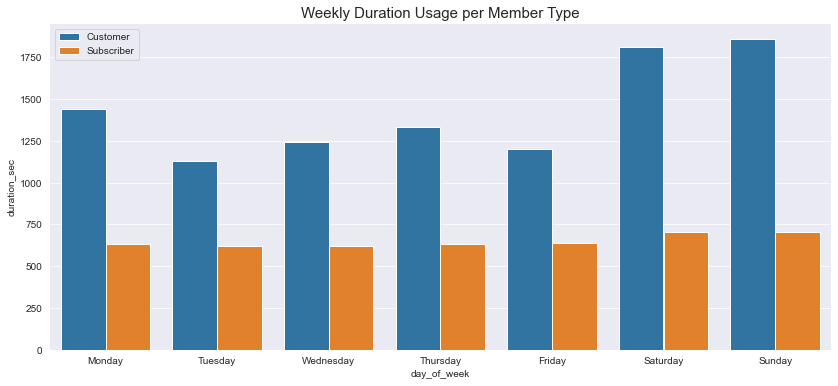

In [46]:
plot_duration_usage_per_member_type(df_copy,'day_of_week',order=day_order,title= 'Weekly Duration Usage per Member Type')

#### Observation:
>WIth the number of rides lowest on weekends, surprisingly, weekends paradoxically holds the longest duration of rides both among subscribers and customers.

> Customers are very high compared to the subscribers in terms of duration travelled

> In Daily basis it seems subcribers travel almost the same duration of distance

> This also might mean that weekends are usually the days used for the proposed leisure  travels by customers 

### What is the distribution of duration of rides by days of the month and Member Type

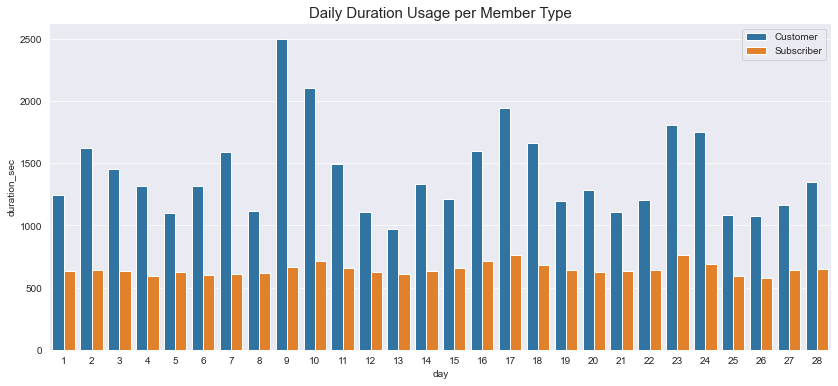

In [47]:
plot_duration_usage_per_member_type(df_copy,'day',title= 'Daily Duration Usage per Member Type')

#### Observation:
>Customers stil surprisingly travel longer durations per days throughot the month with the highest on the 9th day.As noticed earlier, rides by subscribers almost have the same time interval per day. 

### What is the distribution of duration of rides by Hour of the day and Member Type

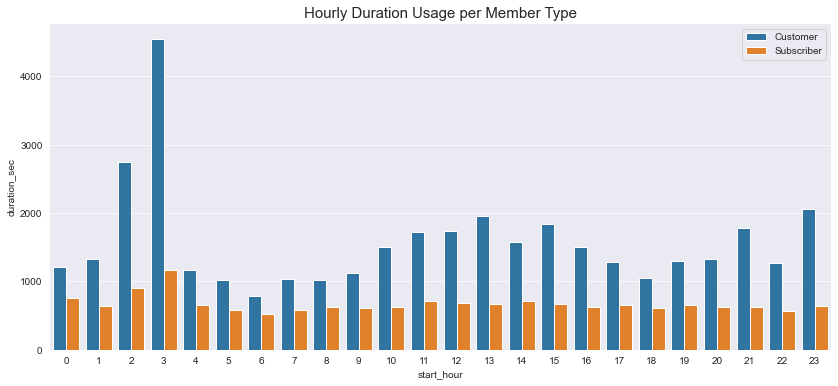

In [48]:
plot_duration_usage_per_member_type(df_copy,'start_hour',title= 'Hourly Duration Usage per Member Type')

### 
> As it is not longer a surprise at this point that customers take less but longer rides, the surprise here is the time time(3am) where the highest number of duration of rides was take. This is completely in contrast to what weve known that less rides were taken during the early hours of the day. We can assume at this point that individuals who take this long journeys are less but majorly travel in the ealry hours of the day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Many of the earlier reported observations were enhanced by the multivariate analysis of the dataset. In comparison to subscribers, customers typically traveled farther for greater seconds by hour, day, and different times of the day. The efficient/short period of usage for subscribers is consistent with their significant concentration during the Monday through Friday rush hours (8:00–9:00 am and 5:00–6:00 pm), showing that the use is likely for commuting to work. Customers appear to be using the bike sharing system differently than subscribers, possibly heavily on weekends for leisure or city tours, as seen by their more flexible and laid-back usage patterns.

>Similar to subscribers, customers typically traveled farther by day of the week and day of the month.

### Were there any interesting or surprising interactions between features?

>Since most bike rides were conducted on weekdays, it is interesting to note that the longest bike trips in terms of duration(secs) were actually taken on weekends.